Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [214]:
NAME = "Farnoush"

# Assignment 3 - Linear Regression

In this assignment, we will be building a linear regression model to understand the drivers which influence car prices. 

The car_data.csv dataset contains the following data points about car prices:

- 1 Car_Name - the model of the car
- 2 Year - the year of the car
- 3 Selling_Price - the current selling price of the used car
- 4 Present_Price - the price of the same car, but new
- 5 Kms_Driven - how many kms have been driven
- 6 Fuel_Type - diesel or gas
- 7 Seller_Type - sold by a dealer or individual seller
- 8 Transmission - standard or automatic
- 9 Owner - number of owners


Complete the following:

**Data Preparation**

**Question 1** _(3 points)_
* Create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

**Question 2** _(3 points)
* Create a new column which captures the age of the car as 'new' or 'old'.

**Question 3** _(3 points)
* Scale the Kms_Driven, Selling_Price, and Present_Price variables (i.e. ensure the variables have the same scale - thousands or tens. You can choose whichever scale you prefer).

**Exploratory Analysis**

**Question 4** _(3 points)_
* Conduct exploratory analysis for the categorical variables. What are you findings?

**Question 5** _(10 points)_
* Conduct exploratory analysis for the continuous variables. Ensure you review each variable by itself, and in combination with the other variables to identify insights and trends. What are your findings?


**Regression Model**

**Question 6** _(1 point)_
* Based on the insights identified, state a hypothesis which you can test with a regression model.  

**Question 7** _(5 points)_
* Build a linear regression model based on your hypothesis. Interpret the results.

**Question 8** _(2 points)_
* How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
Cars = pd.read_csv(r'C:\Users\msfar\OneDrive\Desktop\Python 2- UOT\Module 3\car_data.csv')

In [217]:
Cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [218]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [219]:
df=Cars.drop(['Car_Name','Seller_Type','Fuel_Type','Transmission'], axis=1)

<Axes: >

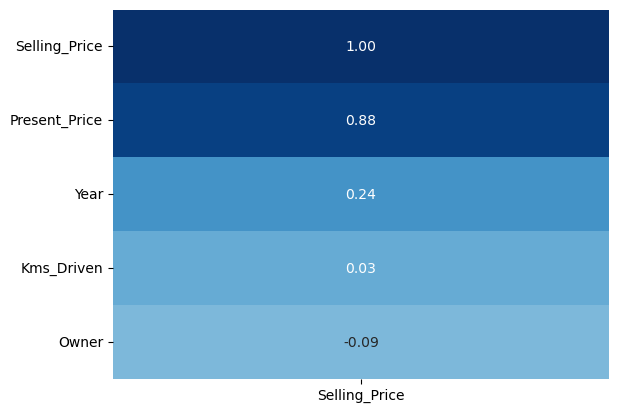

In [220]:
# Just checking for myself.
sns.heatmap(data=df.corr()[['Selling_Price']].sort_values('Selling_Price', ascending=False),
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')


#### Question 1

In [221]:
print(Cars['Seller_Type'].value_counts())
print(Cars['Fuel_Type'].value_counts())
print(Cars['Transmission'].value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [222]:
categColumns = ['Seller_Type','Fuel_Type','Transmission']
dummies_df = pd.get_dummies(Cars[categColumns])
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Seller_Type_Dealer      301 non-null    bool 
 1   Seller_Type_Individual  301 non-null    bool 
 2   Fuel_Type_CNG           301 non-null    bool 
 3   Fuel_Type_Diesel        301 non-null    bool 
 4   Fuel_Type_Petrol        301 non-null    bool 
 5   Transmission_Automatic  301 non-null    bool 
 6   Transmission_Manual     301 non-null    bool 
dtypes: bool(7)
memory usage: 2.2 KB


In [223]:
carsData_numericCols_df = Cars.drop(columns= categColumns)
cars_df = carsData_numericCols_df.join(dummies_df)
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Car_Name                301 non-null    object 
 1   Year                    301 non-null    int64  
 2   Selling_Price           301 non-null    float64
 3   Present_Price           301 non-null    float64
 4   Kms_Driven              301 non-null    int64  
 5   Owner                   301 non-null    int64  
 6   Seller_Type_Dealer      301 non-null    bool   
 7   Seller_Type_Individual  301 non-null    bool   
 8   Fuel_Type_CNG           301 non-null    bool   
 9   Fuel_Type_Diesel        301 non-null    bool   
 10  Fuel_Type_Petrol        301 non-null    bool   
 11  Transmission_Automatic  301 non-null    bool   
 12  Transmission_Manual     301 non-null    bool   
dtypes: bool(7), float64(2), int64(3), object(1)
memory usage: 16.3+ KB


In [224]:
cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,True,False,False,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,True,False,False,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,True,False,False,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,True,False,False,True,False,False,True


I created dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

#### Question 2:

I decided to consider any car with driven under or equal 1000 kms is acceptable for a new car but in reality google suggested under 500 kms.

In [225]:
def age(x):
    if x<=1000:
       return 'new'
    else:
       return 'old'

In [226]:
cars_df['Age'] = cars_df.apply(lambda x: age(x['Kms_Driven']), axis =1)

In [227]:
cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age
0,ritz,2014,3.35,5.59,27000,0,True,False,False,False,True,False,True,old
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True,False,False,True,old
2,ciaz,2017,7.25,9.85,6900,0,True,False,False,False,True,False,True,old
3,wagon r,2011,2.85,4.15,5200,0,True,False,False,False,True,False,True,old
4,swift,2014,4.60,6.87,42450,0,True,False,False,True,False,False,True,old


In [228]:
print (cars_df['Kms_Driven'].max(), cars_df['Kms_Driven'].min())

500000 500


In [229]:
print (cars_df['Year'].max(), cars_df['Year'].min())

2018 2003


In [230]:
cars_df.loc[cars_df['Age'] == 'new']

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age
133,Bajaj Avenger 220,2016,0.72,0.95,500,0,False,True,False,False,True,False,True,new
165,Activa 3g,2016,0.45,0.54,500,0,False,True,False,False,True,True,False,new
166,Hero Passion Pro,2016,0.45,0.55,1000,0,False,True,False,False,True,False,True,new


There are just 3 cars considered new with the described criteria!

#### Question 3:

In [231]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

I am using standard scalar for scaling my scontinous variables.

In [232]:
numericCols = ['Kms_Driven','Selling_Price','Present_Price']
cars_df[numericCols] = scaler.fit_transform(cars_df[numericCols])

cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age
0,ritz,2014,-0.258416,-0.236215,-0.256224,0,True,False,False,False,True,False,True,old
1,sx4,2013,0.017481,0.221505,0.155911,0,True,False,False,True,False,False,True,old
2,ciaz,2017,0.510154,0.257427,-0.773969,0,True,False,False,False,True,False,True,old
3,wagon r,2011,-0.356950,-0.403079,-0.817758,0,True,False,False,False,True,False,True,old
4,swift,2014,-0.012079,-0.087890,0.141743,0,True,False,False,True,False,False,True,old


C:\Users\msfar\AppData\Local\Temp\ipykernel_21648\2156896218.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df["Kms_Driven"])


<Axes: xlabel='Kms_Driven', ylabel='Density'>

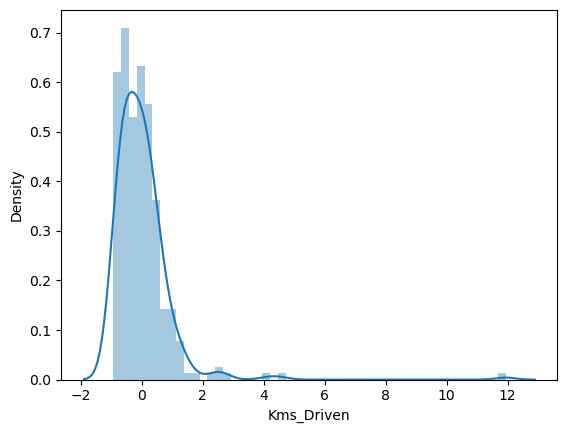

In [233]:
sns.distplot(cars_df["Kms_Driven"])

C:\Users\msfar\AppData\Local\Temp\ipykernel_21648\67627857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df["Selling_Price"])


<Axes: xlabel='Selling_Price', ylabel='Density'>

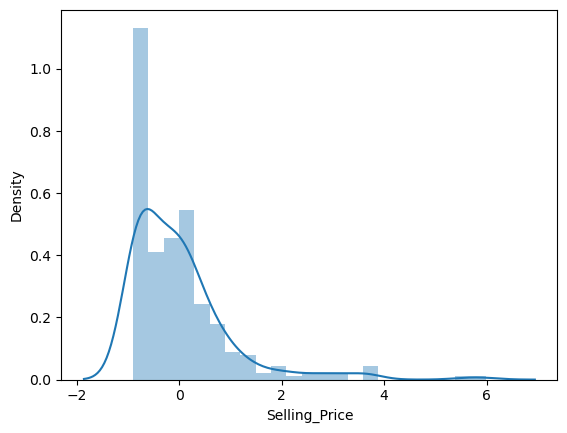

In [234]:
sns.distplot(cars_df["Selling_Price"])

C:\Users\msfar\AppData\Local\Temp\ipykernel_21648\2897875679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars_df["Present_Price"])


<Axes: xlabel='Present_Price', ylabel='Density'>

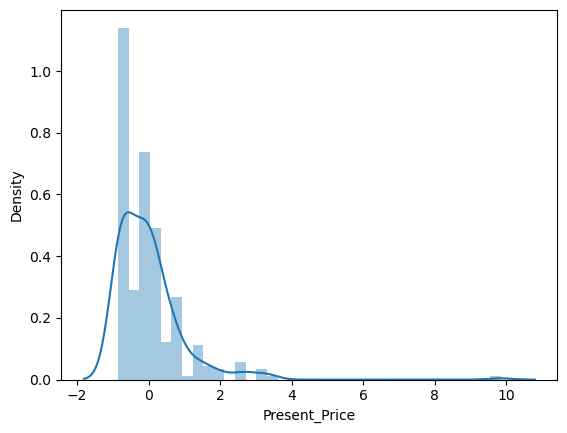

In [235]:
sns.distplot(cars_df["Present_Price"])

I just used standard scalar as these numerical values be in sync with the dummy columns as I am using them later.

#### Question 4:

I am using box plots for each feature to see how much they are related with the selling price and also see the distribution inside of each variable, themselves.

<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

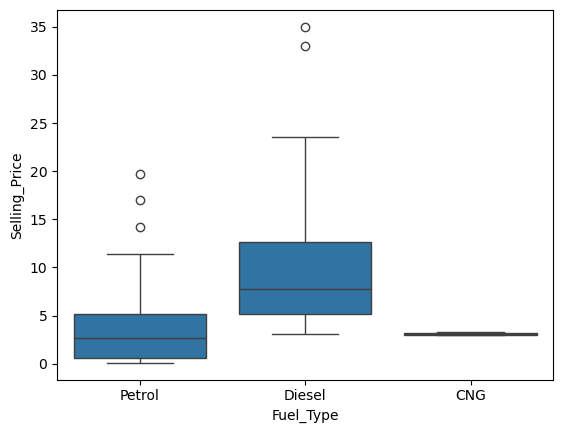

In [236]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=Cars)

<Axes: xlabel='Fuel_Type'>

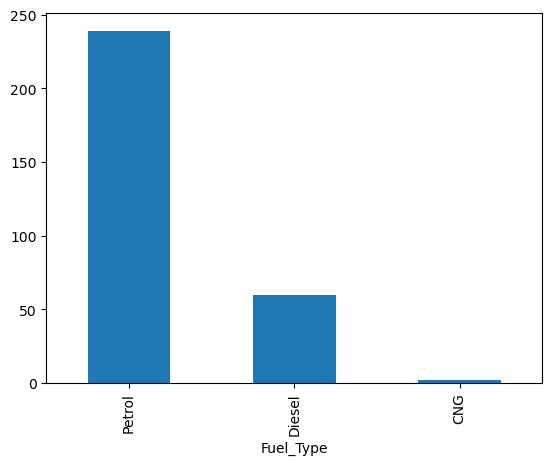

In [237]:
Cars['Fuel_Type'].value_counts().plot(kind='bar')

Disel cars are sold at higher price, although most of teh cars use petrol. We have some outliers for both petrol and disel.

<Axes: xlabel='Seller_Type', ylabel='Selling_Price'>

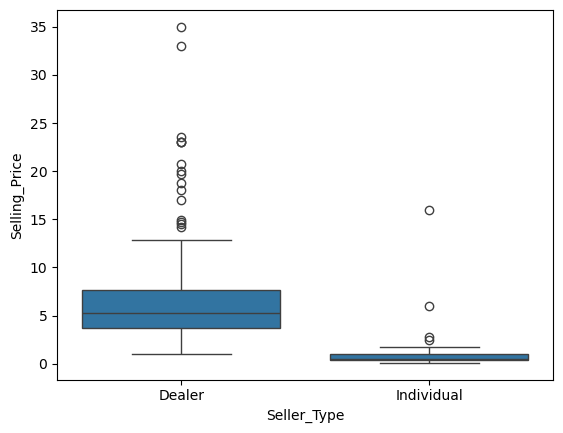

In [238]:
sns.boxplot(x='Seller_Type', y='Selling_Price', data=Cars)

<Axes: xlabel='Seller_Type'>

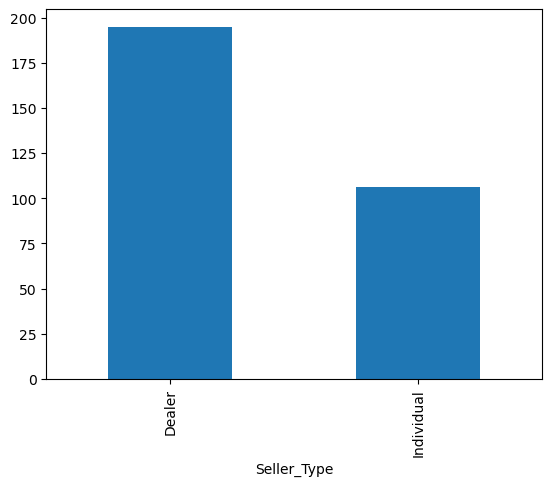

In [239]:
Cars['Seller_Type'].value_counts().plot(kind='bar')

Dealerships sold the cars at higher price and also they are having a lot of outliers, also more cars are sold by dealerships than indivisuals.

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

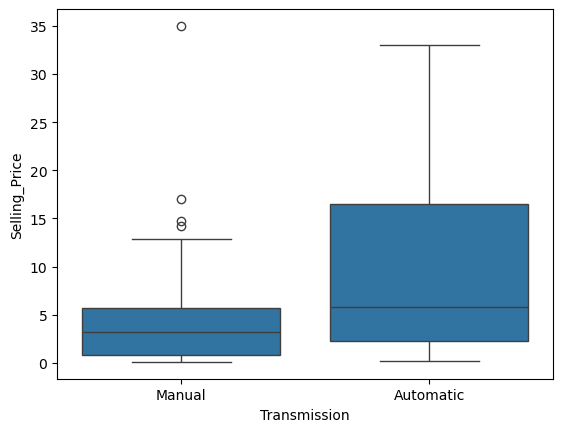

In [240]:
sns.boxplot(x='Transmission', y='Selling_Price', data=Cars)

<Axes: xlabel='Transmission'>

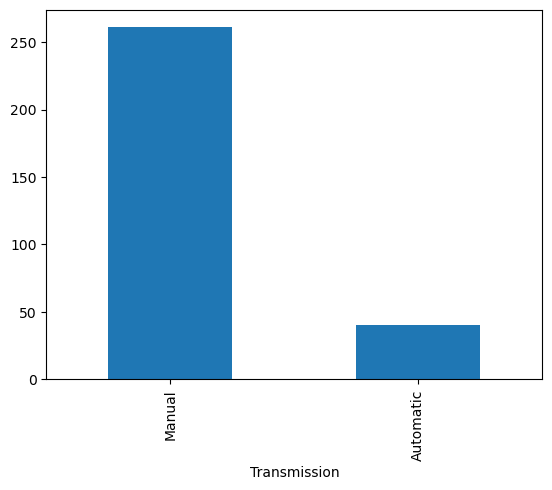

In [241]:
Cars['Transmission'].value_counts().plot(kind='bar')

Automatic cars are sold at higher prices but there are more manual cars than automatic ones in the sample. I am assuming the manual cars are older and the outliers are maybe for race cars or antique cars.

<Axes: xlabel='Owner', ylabel='Selling_Price'>

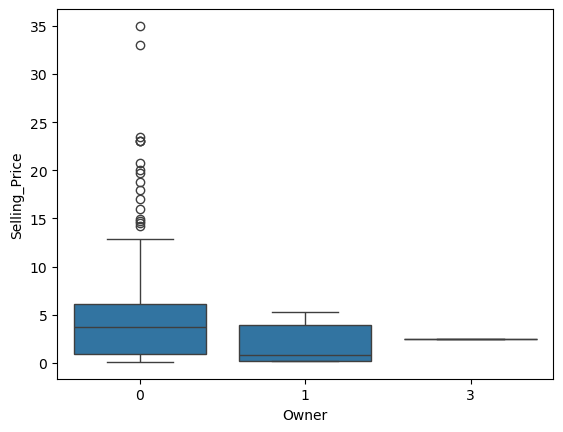

In [242]:
sns.boxplot(x='Owner', y='Selling_Price', data=Cars)

<Axes: xlabel='Owner'>

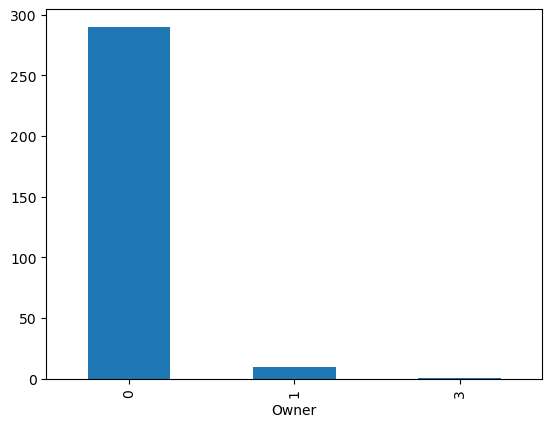

In [243]:
Cars['Owner'].value_counts().plot(kind='bar')

The cars that doesn't have an owner are sold better and there are more of them.

In summary, disel cars, automatic ones, cars without owners and the ones sold by the dealership have higher price.

#### Question 5:

In [244]:
Cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


I am going to make a dataframe with standardize numerical, except the present price as I feel that should be the Y ( independent) value we want to predict.

In [245]:
numericCols = ['Kms_Driven','Present_Price', 'Year']
Cars[numericCols] = scaler.fit_transform(Cars[numericCols])

Cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,0.128897,3.35,-0.236215,-0.256224,Petrol,Dealer,Manual,0
1,sx4,-0.217514,4.75,0.221505,0.155911,Diesel,Dealer,Manual,0
2,ciaz,1.168129,7.25,0.257427,-0.773969,Petrol,Dealer,Manual,0
3,wagon r,-0.910335,2.85,-0.403079,-0.817758,Petrol,Dealer,Manual,0
4,swift,0.128897,4.60,-0.087890,0.141743,Diesel,Dealer,Manual,0


In [246]:
df2=Cars.drop(['Car_Name','Seller_Type','Fuel_Type','Transmission', 'Owner'], axis=1)

In [247]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven
0,0.128897,3.35,-0.236215,-0.256224
1,-0.217514,4.75,0.221505,0.155911
2,1.168129,7.25,0.257427,-0.773969
3,-0.910335,2.85,-0.403079,-0.817758
4,0.128897,4.60,-0.087890,0.141743


In [248]:
df2.describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,3.010000e+02,301.000000,3.010000e+02,3.010000e+02
mean,-2.931579e-14,4.661296,-9.442428e-17,5.901518e-17
std,1.001665e+00,5.082812,1.001665e+00,1.001665e+00
min,-3.681621e+00,0.100000,-8.468932e-01,-9.388230e-01
25%,-5.639244e-01,0.900000,-7.449203e-01,-5.653257e-01
50%,1.288970e-01,3.600000,-1.423532e-01,-1.274323e-01
75%,8.217184e-01,6.000000,2.632208e-01,3.044594e-01
max,1.514540e+00,35.000000,9.846355e+00,1.192752e+01


<Axes: >

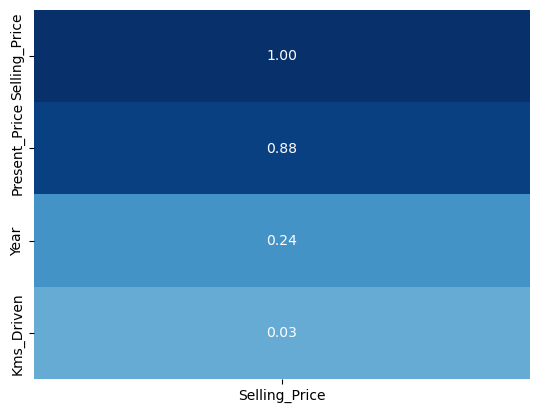

In [249]:
sns.heatmap(data=df2.corr()[['Selling_Price']].sort_values('Selling_Price', ascending=False),
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

Presen_price has the highest correlation with the selling price and after that the year the car is manufactured. The kms the car is driven has little correlation with the present price.

I don't think present price has a correlation with the year and kms_driven but I am going to try anyways. I also believe year and Kms_driven should have correlations.

<Axes: >

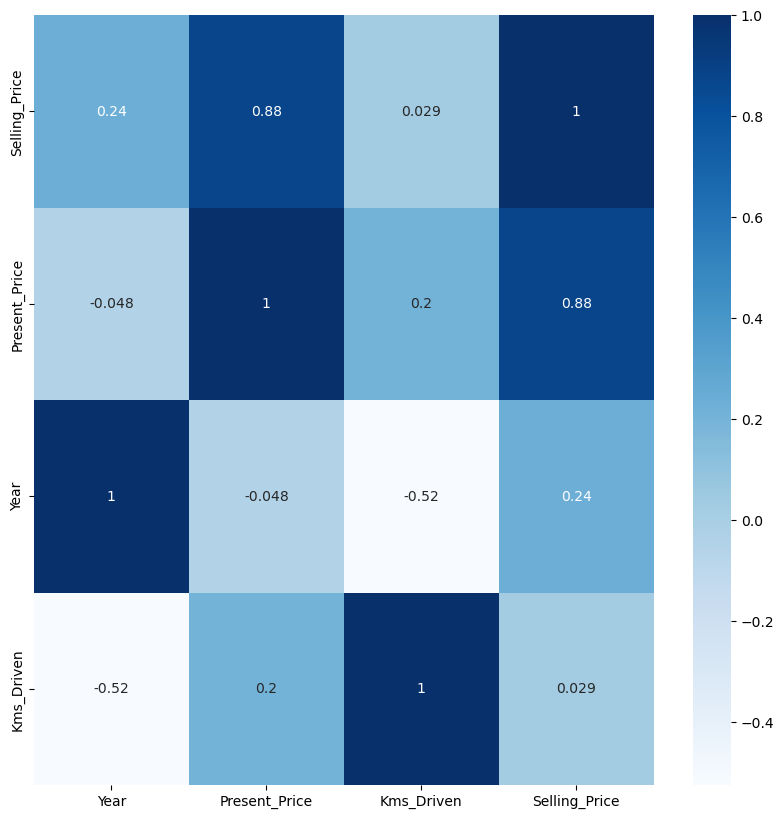

In [250]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df2.corr()[['Year','Present_Price','Kms_Driven','Selling_Price' 
                              ]].sort_values(by='Selling_Price', ascending=False),
            cmap='Blues', annot=True)

As I expected the Kms_driven is correlated with the year with correlation coefficeint of 0.52 which is siginificant but the rest of x values aren't correlated with each other and again the most correlated variable with the selling price is the present price and then the age. Also I should explain that I didn't convert the year to the age and that's why it has a positive correlation with the present price, if it was the age, then it would have a negative correlataion with positive price.

#### Question 6:

As I didn't test the correlation of the dummy variables, I try them first and then will mak my hypothesis!

In [251]:
cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age
0,ritz,2014,-0.258416,-0.236215,-0.256224,0,True,False,False,False,True,False,True,old
1,sx4,2013,0.017481,0.221505,0.155911,0,True,False,False,True,False,False,True,old
2,ciaz,2017,0.510154,0.257427,-0.773969,0,True,False,False,False,True,False,True,old
3,wagon r,2011,-0.356950,-0.403079,-0.817758,0,True,False,False,False,True,False,True,old
4,swift,2014,-0.012079,-0.087890,0.141743,0,True,False,False,True,False,False,True,old


In [252]:
df3 =cars_df.drop(['Car_Name','Year','Present_Price','Kms_Driven','Age','Selling_Price'], axis=1)

In [253]:
df3.head()

,Owner,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,0,True,False,False,False,True,False,True
1,0,True,False,False,True,False,False,True
2,0,True,False,False,False,True,False,True
3,0,True,False,False,False,True,False,True
4,0,True,False,False,True,False,False,True


In [254]:
df4 = df2.join(df3)

In [255]:
df4.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,0.128897,3.35,-0.236215,-0.256224,0,True,False,False,False,True,False,True
1,-0.217514,4.75,0.221505,0.155911,0,True,False,False,True,False,False,True
2,1.168129,7.25,0.257427,-0.773969,0,True,False,False,False,True,False,True
3,-0.910335,2.85,-0.403079,-0.817758,0,True,False,False,False,True,False,True
4,0.128897,4.60,-0.087890,0.141743,0,True,False,False,True,False,False,True


df4.info()

In [256]:
df4['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

I am dropping the one row that the value of owener is 3 as it is just one row and by doing so I can make 'Owener' a categorical value.

In [258]:
df5=df4[df4["Owner"] !=3]

In [259]:
df5['Owner'].value_counts()

Owner
0    290
1     10
Name: count, dtype: int64

In [260]:
df5.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,0.128897,3.35,-0.236215,-0.256224,0,True,False,False,False,True,False,True
1,-0.217514,4.75,0.221505,0.155911,0,True,False,False,True,False,False,True
2,1.168129,7.25,0.257427,-0.773969,0,True,False,False,False,True,False,True
3,-0.910335,2.85,-0.403079,-0.817758,0,True,False,False,False,True,False,True
4,0.128897,4.60,-0.087890,0.141743,0,True,False,False,True,False,False,True


In [261]:
categColumns = ['Owner']
df4 = pd.get_dummies(df4[categColumns])
df4.head()

,Owner
0,0
1,0
2,0
3,0
4,0


In [262]:
df5 = df5.drop(columns= categColumns)
df5 = df5.join(df4)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 300
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    300 non-null    float64
 1   Selling_Price           300 non-null    float64
 2   Present_Price           300 non-null    float64
 3   Kms_Driven              300 non-null    float64
 4   Seller_Type_Dealer      300 non-null    bool   
 5   Seller_Type_Individual  300 non-null    bool   
 6   Fuel_Type_CNG           300 non-null    bool   
 7   Fuel_Type_Diesel        300 non-null    bool   
 8   Fuel_Type_Petrol        300 non-null    bool   
 9   Transmission_Automatic  300 non-null    bool   
 10  Transmission_Manual     300 non-null    bool   
 11  Owner                   300 non-null    int64  
dtypes: bool(7), float64(4), int64(1)
memory usage: 24.2 KB


In [263]:
df5.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner
0,0.128897,3.35,-0.236215,-0.256224,True,False,False,False,True,False,True,0
1,-0.217514,4.75,0.221505,0.155911,True,False,False,True,False,False,True,0
2,1.168129,7.25,0.257427,-0.773969,True,False,False,False,True,False,True,0
3,-0.910335,2.85,-0.403079,-0.817758,True,False,False,False,True,False,True,0
4,0.128897,4.60,-0.087890,0.141743,True,False,False,True,False,False,True,0


<Axes: >

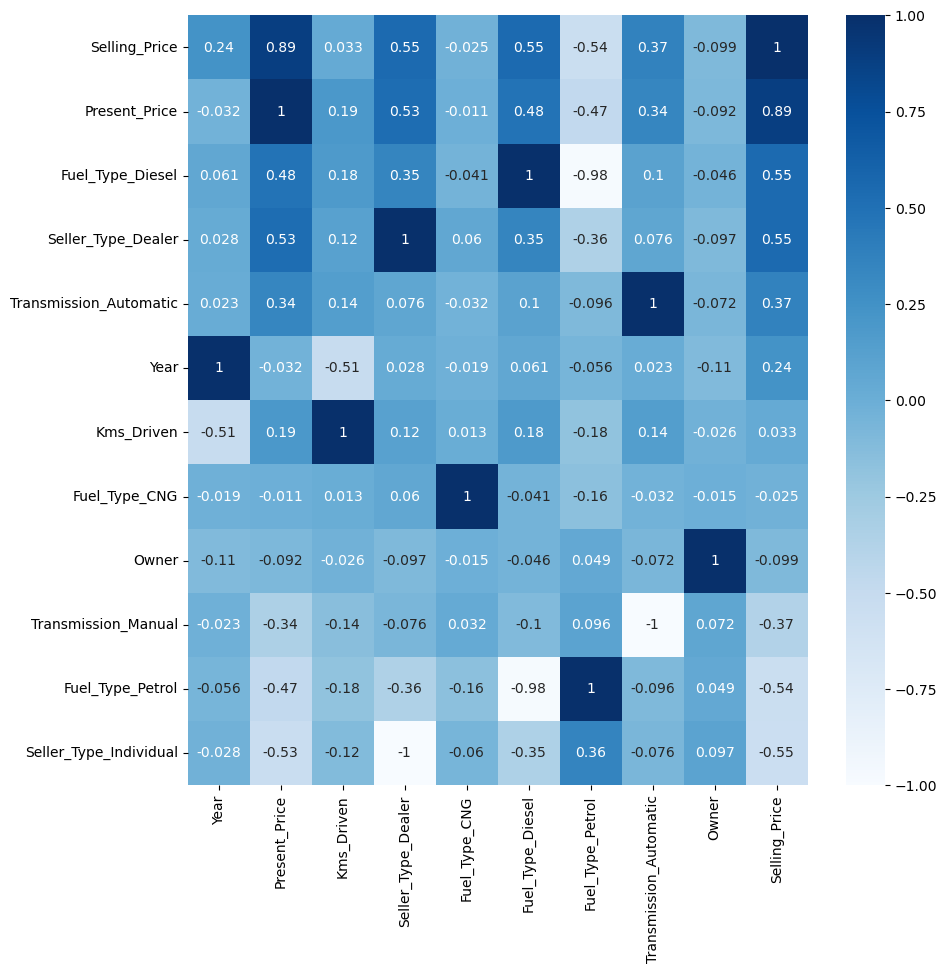

In [264]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df5.corr()[['Year','Present_Price','Kms_Driven','Seller_Type_Dealer','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol','Transmission_Automatic','Owner', 'Selling_Price' 
                              ]].sort_values(by='Selling_Price', ascending=False),
            cmap='Blues', annot=True)

As we can see in the above plot, the present price still is the most significant variable in the selling price prediction, then the fuel type and the seller type and transimission seem equally important.

#### Question 7:

As in the categorical values the seller type seems be more equal so I use the seller type and the present price in my model, so there won't be a problem in the train and test splits.

In [267]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [278]:
x_train, x_test, y_train, y_test = train_test_split(
    df5[['Present_Price']], df5[['Selling_Price']],
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8195102910318478

In [279]:
model.score(x_train, y_train)

0.7769822313666646

The model score on the test dataset is 0.82 whcih is acceptable but I just try the seller type to see if the model improves or not.

In [274]:
carsTrain, carsTest = train_test_split(df5, test_size=0.2,
    random_state=20) 
xCols = ['Present_Price','Seller_Type_Dealer']
model2 = LinearRegression()

model2.fit(carsTrain[xCols], carsTrain['Selling_Price']) 

model2.score(carsTest[xCols], carsTest['Selling_Price'])

0.8209158549560016

In [276]:
model2.score(carsTrain[xCols], carsTrain['Selling_Price'])

0.7890743466083098

The model score on the test dataset is still 0.82, which I believe is a good score, but I there isn't really that much different from previous model. Just the score on the train set is 0.79 which isn't that far from the test score,  and it is improved form the previous model so this model is acceptable.

#### Question 8: 

Yes, I believe if I added variables like the fuel type and transimission, I could improve the model, since they had major correlation with the selling price after the presesnt price and seller type.

I use feature selection to test the above hypothesis:

In [280]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [282]:
fs = SelectKBest(score_func= mutual_info_regression, k=10)

In [284]:
carsTrain, carsTest = train_test_split(df5, test_size=0.2,
    random_state=20) 

In [286]:
fs.fit(df5.drop(columns=['Selling_Price']), df5['Selling_Price'])

SelectKBest(score_func=<function mutual_info_regression at 0x000001D3BF99AFC0>)

In [287]:
x_train_fs = fs.transform(carsTrain.drop(columns=['Selling_Price']))
x_test_fs = fs.transform(carsTest.drop(columns=['Selling_Price']))

In [288]:
model3 = LinearRegression()

model3.fit(x_train_fs, carsTrain['Selling_Price'])

model3.score(x_test_fs, carsTest['Selling_Price'])

0.8479879473210594

In [289]:
dfFeat1 = pd.DataFrame(carsTrain.drop(columns=['Selling_Price']).columns, columns=['feature'])
dfFeat2 = pd.DataFrame(fs.scores_, columns=['importance'])


In [291]:
dfFeat2

,importance
0,0.276290
1,1.322203
2,0.162510
3,0.565145
4,0.574685
5,0.000000
6,0.147113
7,0.169580
8,0.073280
9,0.066839


In [290]:
dfFeat1

,feature
0,Year
1,Present_Price
2,Kms_Driven
3,Seller_Type_Dealer
4,Seller_Type_Individual
5,Fuel_Type_CNG
6,Fuel_Type_Diesel
7,Fuel_Type_Petrol
8,Transmission_Automatic
9,Transmission_Manual


In [292]:
importance_df = dfFeat1.join(dfFeat2)
importance_df.sort_values('importance', ascending=False) 

,feature,importance
1,Present_Price,1.322203
4,Seller_Type_Individual,0.574685
3,Seller_Type_Dealer,0.565145
0,Year,0.276290
7,Fuel_Type_Petrol,0.169580
2,Kms_Driven,0.162510
6,Fuel_Type_Diesel,0.147113
8,Transmission_Automatic,0.073280
9,Transmission_Manual,0.066839
10,Owner,0.007763


As you can see if I included the year, the test score would be improved to 0.85 which actually I didn't expect! And we can see in the feature selection dataframe it is the third important variable. Interesting!